Firstly we import the required packages

In [32]:

from time import sleep

import sys

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm_notebook as tqdm
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import json
import pandas as pd
import time
import requests
import concurrent.futures

from PIL import Image

SyntaxError: invalid syntax (804730489.py, line 7)

Then we wish to tell selenium where to find our driver and the webpage we wish to use

In [31]:
options = webdriver.chrome.options.Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
driver = webdriver.Chrome(path_driver, options = options)
driver.get('https://wego.here.com/directions/mix//tycho-brahes-alle-21-st-th-2300-koebenhavn-s-01017740__21_st__th')
sleep(5)
driver.get_screenshot_as_file("screenshot.png")

True

So far this code goes to here wego maps takes a screenshot at each housing and then crops it to the size which seems best.

In [94]:
def get_screenshots_maps(house_from, house_till):
    options = webdriver.chrome.options.Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')

    path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
    driver = webdriver.Chrome(path_driver, options = options)

    left, upper, right, lower = 800, 200, 1550, 800 #for picture cropping


    with concurrent.futures.ThreadPoolExecutor() as executor:
        threaded_start = time.time()
        for x in tqdm(range (house_from, house_till)):
    
            path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot_' + str(x) + '.png'
            try:
                driver.get('https://wego.here.com/directions/mix//' \
                           + df_Boligsiden1["address.latestForSale.addressId"][x])
                sleep(3)
                driver.get_screenshot_as_file(path)
        
                im = Image.open(path)

                im_crop = im.crop((left, upper, right, lower))
                im_crop.save('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                             'here_wego_screenshot.png', quality=95)

            except:
                print('Could not find address', df_Boligsiden1["address.latestForSale.addressId"][x])
                pass
        print("threaded time:", time.time() - threaded_start)
    return

        
    
    





 20%|██        | 2/10 [00:07<00:31,  4.00s/it]

some weird shit just happened!


 50%|█████     | 5/10 [00:15<00:17,  3.58s/it]

some weird shit just happened!


100%|██████████| 10/10 [00:30<00:00,  3.07s/it]

threaded time: 30.704902172088623


In [353]:
def get_screenshot_maps(address):
    options = webdriver.chrome.options.Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')

    path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
    driver = webdriver.Chrome(path_driver, options = options)

    path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot.png'
    
    driver.get('https://wego.here.com/directions/mix//' \
                + address)
    sleep(5)
    driver.get_screenshot_as_file(path)
        
    im = Image.open(path)
    
    left, upper, right, lower = 925, 375, 1425, 875 #for picture cropping
    im_crop = im.crop((left, upper, right, lower))
    
    im_crop.save('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                             'here_wego_screenshot.png', quality=95)
    
    
    return im_crop

In [371]:

blue = crop_img(get_screenshot_maps(df_Boligsiden1["address.latestForSale.addressId"][3]))

In [373]:
color_dict = {"highway_red": [240, 144, 178],
              "LargeRoad_salmon": [255, 173, 157], 
              "BiggerRoad_Yellow": [254, 251, 167],
              "BigRoad_Yellow": [254, 254, 226],
              "water_blue": [153, 206, 254],
              "buildings_grey": [255, 252, 169],
              "Buildings_darkgrey": [209, 218, 220],
              "Buildings_lightgrey": [224, 230, 234], 
              "largePark_green": [182, 231, 161],
              "smallerPark_green": [212, 230, 218],
              "text_black": [50, 50, 50],
              "street_white": [255, 255, 255]}

address = color_list["address.latestForSale.addressId"][10]
color_list["highway_red"] = color_list["address.latestForSale.addressId"]
color_list["LargeRoad_salmon"] = color_list["address.latestForSale.addressId"]
color_list["BiggerRoad_Yellow"] = color_list["address.latestForSale.addressId"]
color_list["BigRoad_Yellow"] = color_list["address.latestForSale.addressId"]
color_list["water_blue"] = color_list["address.latestForSale.addressId"]
color_list["buildings_grey"] = color_list["address.latestForSale.addressId"]
color_list["Buildings_darkgrey"] = color_list["address.latestForSale.addressId"]
color_list["Buildings_lightgrey"] = color_list["address.latestForSale.addressId"]
color_list["largePark_green"] = color_list["address.latestForSale.addressId"]
color_list["smallerPark_green"] = color_list["address.latestForSale.addressId"]
color_list["text_black"] = color_list["address.latestForSale.addressId"]
color_list["street_white"] = color_list["address.latestForSale.addressId"]
    

for col in color_dict:
    color_list[str(col)][3] = get_percent_color(color_dict[col], blue)


/var/folders/8w/x31_jlr52t90y4rmwchflbpc0000gn/T/ipykernel_21483/1051506581.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_list[str(col)][3] = get_percent_color(color_dict[col], blue)


# Get this to work, and it will all work somewhat smoothly:

In [375]:
color_list[["highway_red",
              "LargeRoad_salmon", 
              "BiggerRoad_Yellow",
              "BigRoad_Yellow",
              "water_blue",
              "buildings_grey",
              "Buildings_darkgrey",
              "Buildings_lightgrey", 
              "largePark_green",
              "smallerPark_green",
              "text_black",
              "street_white" ]]

,highway_red,LargeRoad_salmon,BiggerRoad_Yellow,BigRoad_Yellow,water_blue,buildings_grey,Buildings_darkgrey,Buildings_lightgrey,largePark_green,smallerPark_green,text_black,street_white
0,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...,offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...
1,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...,dalmosevej-30-2400-koebenhavn-nv-01011228__30_...
2,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...
3,0.0,0.0,0.0,0.038444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11866
4,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...
...,...,...,...,...,...,...,...,...,...,...,...,...
8766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8769,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...


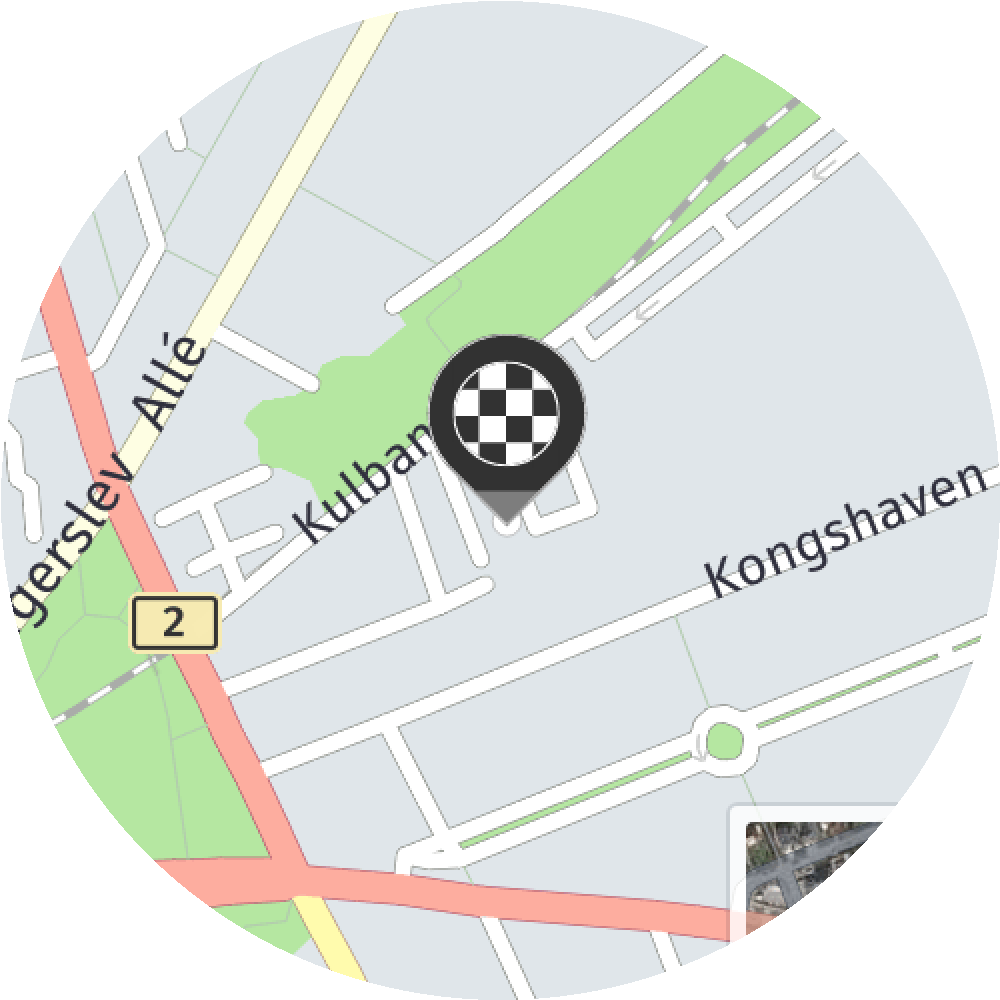

In [372]:
img2 = Image.fromarray(blue)
display(img2)

In [354]:
def crop_img(get_address):
    path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot.png'

    im = cv.imread(path)
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    
    dim = (1000, 1000)
    # resize image
    im = cv.resize(im, dim, interpolation = cv.INTER_AREA)

    # Make new image to set as background
    lum_img = Image.new(mode = "RGB", size = (1000, 1000),
                           color = (255, 255, 255))

    draw = ImageDraw.Draw(lum_img)
    draw.pieslice([(0,0), (1000, 1000)], 0 , 360,
                  fill = 0, outline = "white")

    img_arr = np.array(im)
    lum_img_arr = np.array(lum_img)

    # Switch where color [0, 0, 0] is not to the picture
    img = np.where(lum_img_arr == [0, 0, 0], img_arr, 255)
    return img

In [355]:
def get_percent_color(color, maps_img):
    mylist = [-4, -3, -2, -1, 0 , 1, 2, 3, 4]
    
    R_color = list(map(lambda x: x + color[0], mylist))
    G_color = list(map(lambda x: x + color[1], mylist))
    B_color = list(map(lambda x: x + color[2], mylist))
    
    K = np.where((maps_img[...,0] == R_color[0]) | (maps_img[...,0] == R_color[1]) | 
                 (maps_img[...,0] == R_color[2]) | (maps_img[...,0] == R_color[3]) | 
                 (maps_img[...,0] == R_color[4]) | (maps_img[...,0] == R_color[5]) |
                 (maps_img[...,0] == R_color[6]) | (maps_img[...,0] == R_color[7]) | 
                 (maps_img[...,0] == R_color[7]),
                 maps_img[...,1], 0)
    
    K = np.where((K == G_color[0]) | (K == G_color[1]) | (K == G_color[2]) |
                 (K == G_color[3]) | (K == G_color[4]) | (K == G_color[5]) |
                 (K == G_color[6]) | (K == G_color[7]) | (K == G_color[7]), 
                 img_2[...,2], 0)
    
    K = np.where((K == B_color[0]) | (K == B_color[1]) | (K == B_color[2]) |
                 (K == B_color[3]) | (K == B_color[4]) | (K == B_color[5]) |
                 (K == B_color[6]) | (K == B_color[7]) | (K == B_color[7]), 1, 0).sum()
    K = K/1000000
    return K


In [314]:
for col in color_dict:
    print(col)

#df_Boligsiden1.head()
#color_list = df_Boligsiden1["address.latestForSale.addressId"]
#color_list["highway"] = color_list["address.latestForSale.addressId"]
#color_list = df_Boligsiden1
#color_list["highway"]

highway_red
LargeRoad_salmon
BiggerRoad_Yellow
BigRoad_Yellow
water_blue
buildings_grey
Buildings_darkgrey
Buildings_lightgrey
largePark_green
smallerPark_green
text_black


AttributeError: 'dict' object has no attribute 'columns'

In [362]:
def get_hereWeGo(df):
    color_dict = {"highway_red": [240, 144, 178],
                  "LargeRoad_salmon": [255, 173, 157], 
                  "BiggerRoad_Yellow": [254, 251, 167],
                  "BigRoad_Yellow": [254, 254, 226],
                  "water_blue": [153, 206, 254],
                  "buildings_grey": [255, 252, 169],
                  "Buildings_darkgrey": [209, 218, 220],
                  "Buildings_lightgrey": [224, 230, 234], 
                  "largePark_green": [182, 231, 161],
                  "smallerPark_green": [212, 230, 218],
                  "text_black": [50, 50, 50],
                  "street_white": [255, 255, 255]}
        
    color_list = df_Boligsiden1
    address = color_list["address.latestForSale.addressId"][10]
    color_list["highway_red"] = color_list["address.latestForSale.addressId"]
    color_list["LargeRoad_salmon"] = color_list["address.latestForSale.addressId"]
    color_list["BiggerRoad_Yellow"] = color_list["address.latestForSale.addressId"]
    color_list["BigRoad_Yellow"] = color_list["address.latestForSale.addressId"]
    color_list["water_blue"] = color_list["address.latestForSale.addressId"]
    color_list["buildings_grey"] = color_list["address.latestForSale.addressId"]
    color_list["Buildings_darkgrey"] = color_list["address.latestForSale.addressId"]
    color_list["Buildings_lightgrey"] = color_list["address.latestForSale.addressId"]
    color_list["largePark_green"] = color_list["address.latestForSale.addressId"]
    color_list["smallerPark_green"] = color_list["address.latestForSale.addressId"]
    color_list["text_black"] = color_list["address.latestForSale.addressId"]
    color_list["street_white"] = color_list["address.latestForSale.addressId"]
    
    for row in tqdm(range(len(color_list[:10]))):
        img = crop_img(get_screenshot_maps(address[row]))
        sleep(2)
        for col in color_dict:
            color_list[str(col)][row] = get_percent_color(color_dict[col], img)
        
    return color_list

In [363]:
get_hereWeGo(df_Boligsiden1["address.latestForSale.addressId"][:10])

/var/folders/8w/x31_jlr52t90y4rmwchflbpc0000gn/T/ipykernel_21483/3940877687.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for row in tqdm(range(len(color_list[:10]))):


  0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/8w/x31_jlr52t90y4rmwchflbpc0000gn/T/ipykernel_21483/3940877687.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_list[str(col)][row] = get_percent_color(color_dict[col], img)


,address.gstKvhx,address.municipalityNumber,address.oisPropertyNumber,address.address,address.buildYear,address.rebuildYear,address.postalId,address.city,address.street,address.streetName,...,BiggerRoad_Yellow,BigRoad_Yellow,water_blue,buildings_grey,Buildings_darkgrey,Buildings_lightgrey,largePark_green,smallerPark_green,text_black,street_white
0,01015244__30__1__tv,101,415597,"Offenbachsvej 30, 1. tv, 2450 København SV",1937,0,2450,København SV,"Offenbachsvej 30, 1. tv",Offenbachsvej,...,0.0,0.038444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140741
1,01011228__30_______,101,96130,"Dalmosevej 30, 2400 København NV",1933,0,2400,København NV,Dalmosevej 30,Dalmosevej,...,0.0,0.038444,0.00171,0.0,0.0,0.0,0.0,0.0,0.0,0.181022
2,01017428___4__2_301,101,876810,"Thyrasgade 4, 2. 301, 2200 København N",1974,0,2200,København N,"Thyrasgade 4, 2. 301",Thyrasgade,...,0.0,0.038445,0.197027,0.0,0.0,0.0,0.0,0.0,0.0,0.035577
3,01011094__14_st__tv,101,773434,"Centerparken 14, st. tv, 2500 Valby",1968,0,2500,Valby,"Centerparken 14, st. tv",Centerparken,...,0.0,0.038444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1671
4,01012744__42__2__18,101,777278,"Heimdalsgade 42, 2. 18, 2200 København N",1975,0,2200,København N,"Heimdalsgade 42, 2. 18",Heimdalsgade,...,0.0,0.038448,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.095689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,01015088__10__2__tv,101,399486,"Nyborggade 10, 2. tv, 2100 København Ø",1903,0,2100,København Ø,"Nyborggade 10, 2. tv",Nyborggade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8767,01018452__78_st__th,101,809951,"Vordingborggade 78, st. th, 2100 København Ø",1913,0,2100,København Ø,"Vordingborggade 78, st. th",Vordingborggade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8768,01013204__11_______,101,256839,"Højlandsvangen 11, 2700 Brønshøj",1918,0,2700,Brønshøj,Højlandsvangen 11,Højlandsvangen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8769,01013140_76A_st__tv,101,250717,"Hyltebjerg Allé 76A, st. tv, 2720 Vanløse",1967,0,2720,Vanløse,"Hyltebjerg Allé 76A, st. tv",Hyltebjerg Allé,...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...


In [352]:
color_list[:][]

,address.gstKvhx,address.municipalityNumber,address.oisPropertyNumber,address.address,address.buildYear,address.rebuildYear,address.postalId,address.city,address.street,address.streetName,...,BiggerRoad_Yellow,BigRoad_Yellow,water_blue,buildings_grey,Buildings_darkgrey,Buildings_lightgrey,largePark_green,smallerPark_green,text_black,street_white
0,01015244__30__1__tv,101,415597,"Offenbachsvej 30, 1. tv, 2450 København SV",1937,0,2450,København SV,"Offenbachsvej 30, 1. tv",Offenbachsvej,...,0.0,0.038444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140741
1,01011228__30_______,101,96130,"Dalmosevej 30, 2400 København NV",1933,0,2400,København NV,Dalmosevej 30,Dalmosevej,...,0.0,0.038444,0.00171,0.0,0.0,0.0,0.0,0.0,0.0,0.183967
2,01017428___4__2_301,101,876810,"Thyrasgade 4, 2. 301, 2200 København N",1974,0,2200,København N,"Thyrasgade 4, 2. 301",Thyrasgade,...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...,thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...
3,01011094__14_st__tv,101,773434,"Centerparken 14, st. tv, 2500 Valby",1968,0,2500,Valby,"Centerparken 14, st. tv",Centerparken,...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...,centerparken-14-st-tv-2500-valby-01011094__14_...
4,01012744__42__2__18,101,777278,"Heimdalsgade 42, 2. 18, 2200 København N",1975,0,2200,København N,"Heimdalsgade 42, 2. 18",Heimdalsgade,...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...,heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,01015088__10__2__tv,101,399486,"Nyborggade 10, 2. tv, 2100 København Ø",1903,0,2100,København Ø,"Nyborggade 10, 2. tv",Nyborggade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8767,01018452__78_st__th,101,809951,"Vordingborggade 78, st. th, 2100 København Ø",1913,0,2100,København Ø,"Vordingborggade 78, st. th",Vordingborggade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8768,01013204__11_______,101,256839,"Højlandsvangen 11, 2700 Brønshøj",1918,0,2700,Brønshøj,Højlandsvangen 11,Højlandsvangen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8769,01013140_76A_st__tv,101,250717,"Hyltebjerg Allé 76A, st. tv, 2720 Vanløse",1967,0,2720,Vanløse,"Hyltebjerg Allé 76A, st. tv",Hyltebjerg Allé,...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...,hyltebjerg-alle-76a-st-tv-2720-vanloese-010131...


In [317]:
df = pd.DataFrame({'Name': ['Ali', 'Aqsa', 'Armaan', 'Arij'], 
        'Age': [34, 26, 56, 44], 
        'Position': ['Senior Engineer', 'Junior Engineer', 'HR Officer', 'COO']})

print("Dataframe before adding new column:")
print(df)

# Adding salary column by indexing and assigning a list
df['salary'] = [200000, 70000, 110000, 670000]

print("Dataframe after adding new column:")
print(df)

Dataframe before adding new column:
     Name  Age         Position
0     Ali   34  Senior Engineer
1    Aqsa   26  Junior Engineer
2  Armaan   56       HR Officer
3    Arij   44              COO
Dataframe after adding new column:
     Name  Age         Position  salary
0     Ali   34  Senior Engineer  200000
1    Aqsa   26  Junior Engineer   70000
2  Armaan   56       HR Officer  110000
3    Arij   44              COO  670000


In [316]:
crop_img(get_screenshot_maps(df_Boligsiden1["address.latestForSale.addressId"][3])).shape

(1000, 1000, 3)

(1000, 1000, 3)


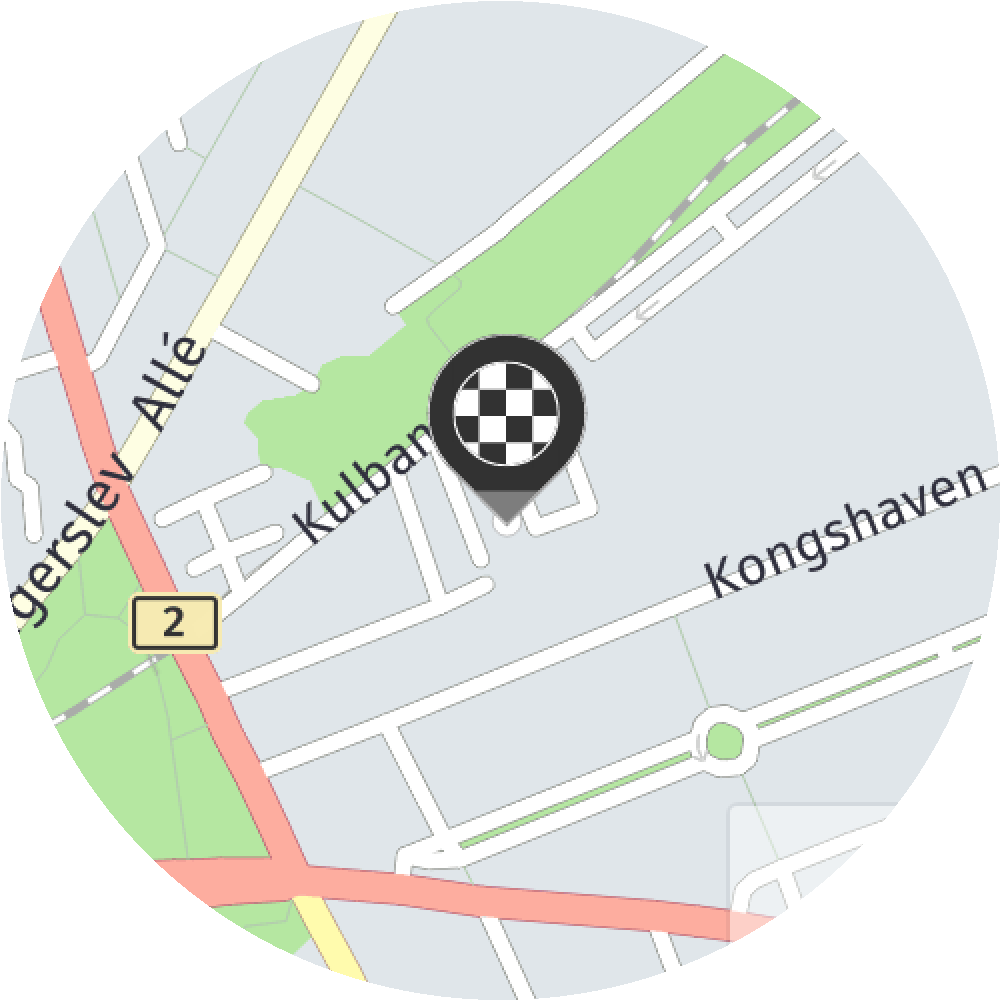

In [291]:
path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot.png'
#im = Image.open(path)

im = cv.imread(path)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)


    
dim = (1000, 1000)
# resize image
im = cv.resize(im, dim, interpolation = cv.INTER_AREA)


lum_img = Image.new(mode = "RGB", size = (1000, 1000),
                           color = (255, 255, 255))


draw = ImageDraw.Draw(lum_img)
    
draw.pieslice([(0,0), (1000, 1000)], 0 , 360,
              fill = 0, outline = "white")



img_arr = np.array(im)
lum_img_arr = np.array(lum_img)

img_arr_2 = np.where(lum_img_arr == [0, 0, 0], img_arr, 255)
    

print(img_arr_2.shape)
img2 = Image.fromarray(img_arr_2)
display(img2)


#outer_img = Image.open('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
#                'outer_cirkle.png' )
#draw = ImageDraw.Draw(outer_img)
#draw.pieslice([(0,0), (height,width)], 0, 360, 
#              fill=(255, 255, 255), outline = "white")
#img_arr = np.array(img)


#lum_img_arr = np.array(outer_img)
#img2 = Image.fromarray(lum_img_arr)
#display(img2)


#path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
           #     'outer_cirkle2.png'
#img_2 = cv.imread(path)
#img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

#dim = (1000, 1000)
# resize image
#img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
#img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)


In [251]:
import numpy as np
from PIL import Image, ImageDraw


   
    
    
    path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot.png'
    im = Image.open(path)
    
    left, upper, right, lower = 800, 200, 1550, 800 #for picture cropping
    im_crop = im.crop((left, upper, right, lower))
    
    height,width = im.size
    
    lum_img = Image.new("RGB", [height, width], 0)
    draw = ImageDraw.Draw(lum_img)
    

    draw.pieslice([(0,0), (heigh,width)], 0 , 360,
                 fill = 255, outline = "white")
    
    img_arr = np.array(im)
    lum_img_arr = np.array(lum_img)
    
    final_img_arr = np.dstack((img_arr,lum_img_arr))
    return fimal_img_arr
crop_img

AttributeError: 'function' object has no attribute 'shape'

In [ ]:
address = df_Boligsiden1["address.latestForSale.addressId"]
def get_screenshots_maps(address):
    options = webdriver.chrome.options.Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')

    path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
    driver = webdriver.Chrome(path_driver, options = options)

    path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot.png'
    
    driver.get('https://wego.here.com/directions/mix//' \
                + address)
    sleep(3)
    driver.get_screenshot_as_file(path)
        
    im = Image.open(path)
    
    left, upper, right, lower = 800, 200, 1550, 800 #for picture cropping
    im_crop = im.crop((left, upper, right, lower))
    
    return im_crop



def get_screenshots_maps(house_from, house_till):
    options = webdriver.chrome.options.Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')

    path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
    driver = webdriver.Chrome(path_driver, options = options)

    


    with concurrent.futures.ThreadPoolExecutor() as executor:
        threaded_start = time.time()
        for x in tqdm(range (house_from, house_till)):
    
            path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot_' + str(x) + '.png'
            try:
                driver.get('https://wego.here.com/directions/mix//' \
                           + df_Boligsiden1["address.latestForSale.addressId"][x])
                sleep(3)
                driver.get_screenshot_as_file(path)
        
                im = Image.open(path)

                im_crop = im.crop((left, upper, right, lower))
                im_crop.save('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                             'here_wego_screenshot.png', quality=95)

            except:
                print('Could not find address', df_Boligsiden1["address.latestForSale.addressId"][x])
                pass
        print("threaded time:", time.time() - threaded_start)
    return

In [239]:
color_dict = {"highway": [240, 144, 178],
              "LargeRoad_salmon": [255, 173, 157], 
              "BiggerRoad_Yellow": [254, 251, 167],
              "BigRoad_Yellow": [254, 254, 226],
              "water_blue": [153, 206, 254],
              "buildings_grey": [255, 252, 169],
              "Buildings_darkgrey": [209, 218, 220],
              "Buildings_lightgrey": [224, 230, 234], 
              "largePark_green": [182, 231, 161],
              "smallerPark_green": [212, 230, 218],
              "text_black": [50, 50, 50]}

def get_percent_color(color, maps_img):
    mylist = [-4, -3, -2, -1, 0 , 1, 2, 3, 4]
    
    R_color = list(map(lambda x: x + color[0], mylist))
    G_color = list(map(lambda x: x + color[1], mylist))
    B_color = list(map(lambda x: x + color[2], mylist))
    
    K = np.where((maps_img[...,0] == R_color[0]) | (maps_img[...,0] == R_color[1]) | 
                 (maps_img[...,0] == R_color[2]) | (maps_img[...,0] == R_color[3]) | 
                 (maps_img[...,0] == R_color[4]) | (maps_img[...,0] == R_color[5]) |
                 (maps_img[...,0] == R_color[6]) | (maps_img[...,0] == R_color[7]) | 
                 (maps_img[...,0] == R_color[7]),
                 maps_img[...,1], 0)
    
    K = np.where((K == G_color[0]) | (K == G_color[1]) | (K == G_color[2]) |
                 (K == G_color[3]) | (K == G_color[4]) | (K == G_color[5]) |
                 (K == G_color[6]) | (K == G_color[7]) | (K == G_color[7]), 
                 img_2[...,2], 0)
    
    K = np.where((K == B_color[0]) | (K == B_color[1]) | (K == B_color[2]) |
                 (K == B_color[3]) | (K == B_color[4]) | (K == B_color[5]) |
                 (K == B_color[6]) | (K == B_color[7]) | (K == B_color[7]), 1, 0).sum()
    K = K/1000000
    return K



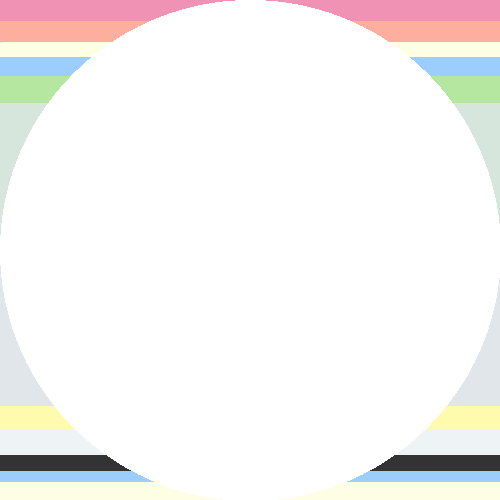

In [148]:
import numpy as np
from PIL import Image, ImageDraw


def show_img_compar(img_1, img_2, img_3):
    f, ax = plt.subplots(1, 2, 3, figsize=(6,6,6))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[2]
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    ax[2].axis('off')
    f.tight_layout()
    plt.show()

path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot_9.png'    
img=Image.open(path)
#display(img)
  
height,width = img.size

#lum_img = Image.new('RGB', [height,width] ,
#                           color = (0, 0, 0))
  
outer_img = Image.open('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'outer_cirkle.png' )
draw = ImageDraw.Draw(outer_img)
draw.pieslice([(0,0), (height,width)], 0, 360, 
              fill=(255, 255, 255), outline = "white")
img_arr = np.array(img)


lum_img_arr = np.array(outer_img)
img2 = Image.fromarray(lum_img_arr)
display(img2)





In [149]:
img2.save('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'outer_cirkle2.png', quality=95)

In [150]:
from sklearn.cluster import KMeans

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline


def show_img_compar(img_1, img_2):
    f, ax = plt.subplots(1, 2, figsize=(6,6))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

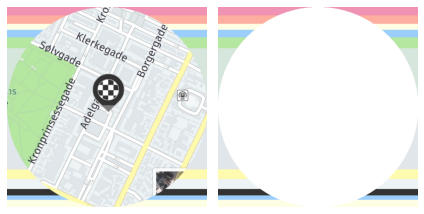

In [189]:


x = 9
path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/here_wego_screenshot_' + str(x) + '.png'

#img = Image.open(path)
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

x = 4
path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'outer_cirkle2.png'
img_2 = cv.imread(path)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (1000, 1000)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)


show_img_compar(D, img_2)


In [190]:
D = np.where(img_2 > 254, img, img_2)
D.shape

(1000, 1000, 3)

In [193]:
#D = Image.fromarray(D)
D.save('/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'outer_cirkle3.png', quality=95)

In [201]:

a = [239, 240, 238, 220]
K = np.where(img_2[:,:,0] == a, 1, 0)

/var/folders/8w/x31_jlr52t90y4rmwchflbpc0000gn/T/ipykernel_21483/3031452688.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  K = np.where(img_2[:,:,0] == a, 1, 0)


In [202]:
def get_range_color(size):
    K = []
    for i in range(size):
        K_0 = np.where(img_2[...,0] == i, 1/3, 0) 
        
        
    K_1 = np.where(img_2[...,1] == size, 1/3, 0)
    K_2 = np.where(img_2[...,2] == size, 1/3, 0)
    K_sum = K_0 + K_1 + K_2
    K_color_percentage = (np.where(K_sum == 1, 1, 0).sum())/1000000
    return K_color_percentage

0

In [ ]:
def get_range_color(size):
    K = []
    for i in range(size):
        K_0 = np.where(img_2[...,0] == a[i], img_2[...,1], 0)
    K_1 = np.where(K_0 == b[i], img_2[...,2], 0)
    k_2 = np.where(K_1 == c[i], 1).sum()
    

In [226]:
color = green
mylist = [-4, -3, -2, -1, 0 , 1, 2, 3, 4]
R_color = list(map(lambda x: x + color[0], mylist))
R_color

[178, 179, 180, 181, 182, 183, 184, 185, 186]

In [225]:
green=[182,231,161]

In [207]:
def createList(r1, r2):
    return [item for item in range(r1, r2+1)]
createList(-2, 3) + 82
  

TypeError: can only concatenate list (not "int") to list

In [196]:
B = np.where(np.where(img_2 == [239, 146, 179], 1/3, 0).sum(axis = 2) == 1, 1, 0)
C = np.where(img_2 == [182, 231, 161], 1/3, 0).sum()

In [197]:
print(B.sum())
print(C)

30660
12652.0


In [159]:
img_2

array([[[239, 146, 179],
        [239, 146, 179],
        [239, 146, 179],
        ...,
        [239, 146, 179],
        [239, 146, 179],
        [239, 146, 179]],

       [[239, 146, 179],
        [239, 146, 179],
        [239, 146, 179],
        ...,
        [239, 146, 179],
        [239, 146, 179],
        [239, 146, 179]],

       [[239, 146, 179],
        [239, 146, 179],
        [239, 146, 179],
        ...,
        [239, 146, 179],
        [239, 146, 179],
        [239, 146, 179]],

       ...,

       [[254, 254, 228],
        [254, 254, 228],
        [254, 254, 228],
        ...,
        [254, 254, 228],
        [254, 254, 228],
        [254, 254, 228]],

       [[254, 254, 228],
        [254, 254, 228],
        [254, 254, 228],
        ...,
        [254, 254, 228],
        [254, 254, 228],
        [254, 254, 228]],

       [[254, 254, 228],
        [254, 254, 228],
        [254, 254, 228],
        ...,
        [254, 254, 228],
        [254, 254, 228],
        [254, 254, 228]]

In [92]:
#final_img = img_2[[(img_2 == 255), img_2 = img]]
#final_img = img_2[[(img_2[:][0] == 255)]]
img

array([[[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [238, 243, 245],
        [238, 243, 245],
        [238, 243, 245]],

       [[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [238, 243, 245],
        [238, 243, 245],
        [238, 243, 245]],

       [[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [238, 243, 245],
        [238, 243, 245],
        [238, 243, 245]],

       ...,

       [[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [138, 141, 147],
        [123, 126, 132],
        [123, 126, 132]],

       [[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [138, 141, 147],
        [138, 141, 147],
        [138, 141, 147]],

       [[238, 243, 245],
        [238, 243, 245],
        [238, 243, 245],
        ...,
        [138, 141, 147],
        [138, 141, 147],
        [138, 141, 147]]

In [41]:
maps_scraping = pd.read_csv("cleaning_final.csv")
df_Boligsiden1 = pd.read_csv("boligsiden_1_K1.csv")

/Users/thommasbiener/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/thommasbiener/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (84,134,141,142,143,145,146,149,150,152) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
maps_scraping.head()

,address_b,street_b,streetName_b,postalId_b,municipalityNumber_b,city_b,valuationDate_b,propertyValuation_b,salePrice_b,paymentCash_b,...,coast_h,sportshall_h,forest_h,priceIndex_s,priceChangeMPriorIndex_s,priceChangeYPriorIndex_s,OMXC20_s,mortgageRate_s,unemploymentRateDK_s,unemploymentRateCPH_s
0,"Gammel Kongevej 49, 1. th, 1610 København V","Gammel Kongevej 49, 1. th",Gammel Kongevej,1610,101,København V,2021-01-10,3900000.0,1900000.0,5495000.0,...,1687.92,1310.08,6885.94,115.122873,3.0,5.7,752.0,1.761,3.7,3.9
1,"Andreas Bjørns Gade 18, st. th, 1428 København K","Andreas Bjørns Gade 18, st. th",Andreas Bjørns Gade,1428,101,København K,2021-01-10,680000.0,1725000.0,1795000.0,...,193.33,485.03,6724.04,115.122873,3.0,5.7,752.0,1.761,3.7,3.9
2,"Theklavej 39, 2. 51, 2400 København NV","Theklavej 39, 2. 51",Theklavej,2400,101,København NV,2021-01-10,1100000.0,2295000.0,2295000.0,...,4637.02,948.34,6435.41,115.122873,3.0,5.7,752.0,1.761,3.7,3.9
3,"Vinkelager 27, 4. th, 2720 Vanløse","Vinkelager 27, 4. th",Vinkelager,2720,101,Vanløse,2021-01-10,2000000.0,4025000.0,4095000.0,...,5394.40,1143.66,3888.11,115.122873,3.0,5.7,752.0,1.761,3.7,3.9
4,"Frederiksborgvej 43B, 1. th, 2400 København NV","Frederiksborgvej 43B, 1. th",Frederiksborgvej,2400,101,København NV,2021-01-10,860000.0,2020000.0,2095000.0,...,4278.88,1225.72,6204.57,115.122873,3.0,5.7,752.0,1.761,3.7,3.9


In [43]:
df_Boligsiden1["address.latestForSale.addressId"].head()

0    offenbachsvej-30-1-tv-2450-koebenhavn-sv-01015...
1    dalmosevej-30-2400-koebenhavn-nv-01011228__30_...
2    thyrasgade-4-2-301-2200-koebenhavn-n-01017428_...
3    centerparken-14-st-tv-2500-valby-01011094__14_...
4    heimdalsgade-42-2-18-2200-koebenhavn-n-0101274...
Name: address.latestForSale.addressId, dtype: object

In [198]:
options = webdriver.chrome.options.Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')

path_driver = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/chromedriver'
driver = webdriver.Chrome(path_driver, options = options)

left, upper, right, lower = 925, 375, 1425, 875 #for picture cropping


with concurrent.futures.ThreadPoolExecutor() as executor:
    threaded_start = time.time()
    for x in tqdm(range (0, 30)):
    
        path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/'\
                'here_wego_screenshot_' + str(x) + '.png'
        try:
            driver.get('https://wego.here.com/directions/mix//' \
                       + df_Boligsiden1["address.latestForSale.addressId"][x])
            sleep(3)
            driver.get_screenshot_as_file(path)
        
            im = Image.open(path)

            im_crop = im.crop((left, upper, right, lower))
            im_crop.save(path, quality=95)

        except:
            pass
    print("threaded time:", time.time() - threaded_start)

/var/folders/8w/x31_jlr52t90y4rmwchflbpc0000gn/T/ipykernel_21483/4212597865.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm(range (0, 30)):


  0%|          | 0/30 [00:00<?, ?it/s]

threaded time: 120.06684279441833


In [120]:
from sklearn.cluster import KMeans

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

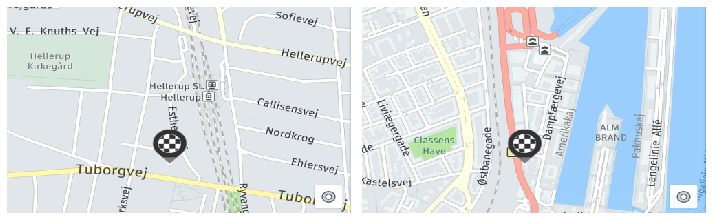

In [219]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

x = 3
path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/here_wego_screenshot_' + str(x) + '.png'

#img = Image.open(path)
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

x = 4
path = '/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/programming/screenshots/here_wego_screenshot_' + str(x) + '.png'

img_2 = cv.imread(path)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

#dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)


show_img_compar(img, img_2)


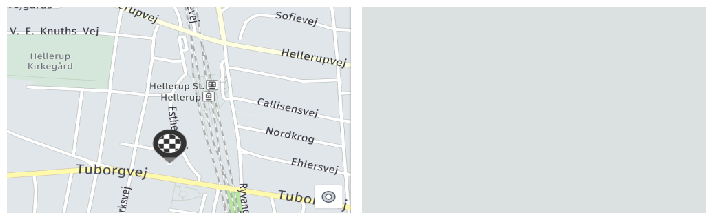

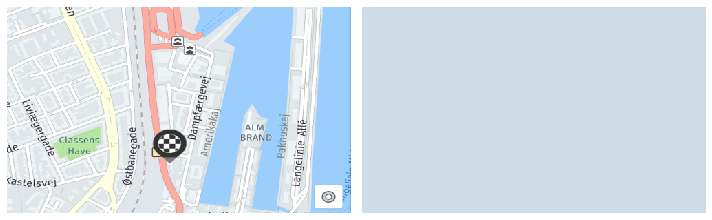

In [220]:
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))

img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

In [221]:
print(img.shape)
#img

(300, 500, 3)


In [222]:
print(img.reshape(-1, 3).shape)
img.reshape(-1, 3)

(150000, 3)


array([[255, 255, 255],
       [255, 255, 255],
       [177, 178, 184],
       ...,
       [248, 248, 248],
       [238, 238, 238],
       [181, 183, 180]], dtype=uint8)

In [223]:
unique, counts = np.unique(img.reshape(-1, 3), axis = 0, return_counts = True)
print(unique)
print(counts)

[[ 48  48  61]
 [ 49  49  49]
 [ 49  49  61]
 ...
 [255 255 253]
 [255 255 254]
 [255 255 255]]
[   57    12     1 ...     5     4 10139]


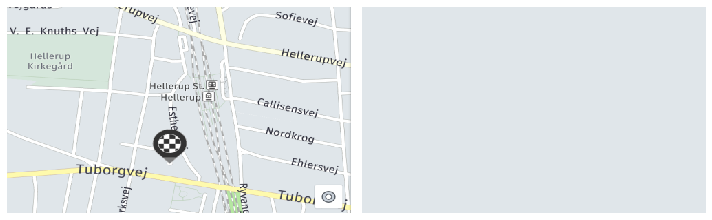

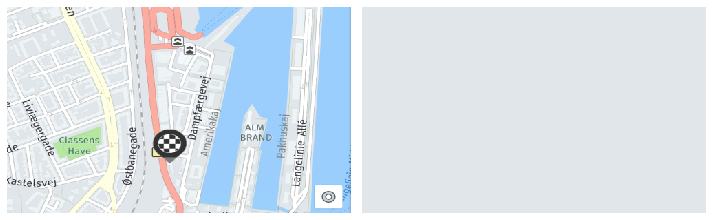

In [224]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

In [135]:
clt = KMeans(n_clusters = 11)
clt.fit(D.reshape(-1, 3))

KMeans(n_clusters=11)

In [136]:
clt.labels_

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [137]:
clt.cluster_centers_

array([[155.        , 206.        , 252.        ],
       [253.99611372, 253.98609123, 228.07762324],
       [ 52.60318684,  52.58879465,  56.50261287],
       [181.25149718, 229.84860408, 161.45667583],
       [221.61748319, 228.46575776, 231.03364478],
       [245.21926073, 157.6092867 , 170.70765236],
       [253.64792093, 249.50587935, 173.05103954],
       [238.01770522, 242.87647028, 244.78656455],
       [112.63691479, 114.91579656, 114.97945436],
       [181.25051171, 183.38321583, 176.26438481],
       [254.73191827, 254.77107717, 254.78865305]])

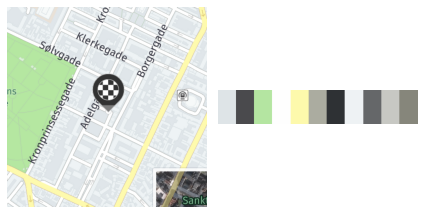

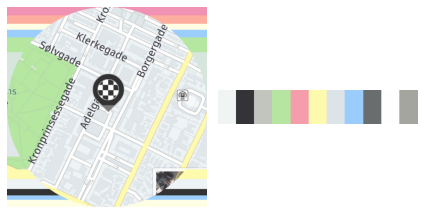

In [139]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(D.reshape(-1, 3))
show_img_compar(D, palette(clt_2))

{0: 0.8, 1: 0.03, 2: 0.02, 3: 0.02, 4: 0.02, 5: 0.01, 6: 0.01, 7: 0.02, 8: 0.04, 9: 0.02, 10: 0.01}
[[255.         255.         255.        ]
 [239.         146.         179.        ]
 [ 51.          51.          51.        ]
 [155.         206.         252.        ]
 [182.         231.         161.        ]
 [214.         230.         220.        ]
 [254.         250.         174.        ]
 [254.         174.         159.        ]
 [254.         254.         228.        ]
 [237.99599109 242.99665924 244.99665924]
 [225.         230.         234.        ]]


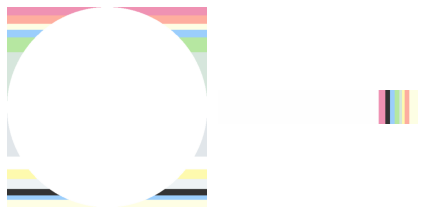

{0: 0.14, 1: 0.23, 2: 0.05, 3: 0.05, 4: 0.28, 5: 0.05, 6: 0.02, 7: 0.01, 8: 0.04, 9: 0.1, 10: 0.04}
[[181.25149718 229.84860408 161.45667583]
 [238.01770522 242.87647028 244.78656455]
 [ 52.60318684  52.58879465  56.50261287]
 [245.21926073 157.6092867  170.70765236]
 [221.61748319 228.46575776 231.03364478]
 [253.64792093 249.50587935 173.05103954]
 [155.         206.         252.        ]
 [112.63691479 114.91579656 114.97945436]
 [181.25051171 183.38321583 176.26438481]
 [254.73191827 254.77107717 254.78865305]
 [253.99611372 253.98609123 228.07762324]]


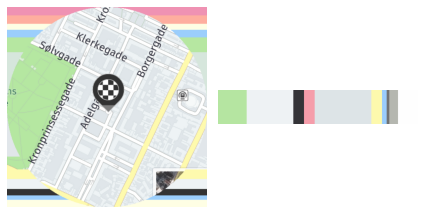

In [143]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette
    
    
    
clt_1 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_1))

clt_2 = clt.fit(D.reshape(-1, 3))
show_img_compar(D, palette_perc(clt_2))


In [ ]:
maps_building_grey
maps_nonbuilding_lightgrey
maps_trainroad_darkgrey

maps_park_green
maps_greenarea_lightgreen

maps_biggestroad_rosa
maps_biggerroad_salmon
maps_bigroad_yellow
maps_street_white

maps_tekst_black

maps_water_blue


In [ ]:
grey_housing = get_perc(clt_1)[0][:] 

grey = 223.84, 230.06, 233.19
black = 64.08, 69.09, 70.22
blue_water = 154.56, 205.40, 250.87
green_parks = 178.10, 212.42, 166.45
red_largeroads = 247.94, 170.78, 158.98
white_smallroads = 246.55, 248.83, 246.45
darkgrey_h = 208.24, 212.66, 208.61


df_maps_color = pd.DataFrame()   

def get_color(color, lower, upper, k):
    if color[0] - lower > get_perc(clt_1)[0][k][0] and get_perc(clt_1)[0][k][0] > color[0] + upper \
        and color[1] - lower > get_perc(clt_1)[0][k][1] and get_perc(clt_1)[0][k][1] > color[1] + upper\
        and color[2] - lower > get_perc(clt_1)[0][k][] and get_perc(clt_1)[0][k][2] > color[2] + upper:
        df_maps_color[str(color)] = get_perc(clt_1)[0][k] #Make cloumn for each color
    else: df_maps_color[str(color)] = 0
    return df_maps_color
        
get_color(grey, 2, 2, 0)
        
def get_color(color, lower, upper, k):
    if color[0] - lower > get_perc(clt_1)[0][k][0] and get_perc(clt_1)[0][k][0] > color[0] + upper \
        and color[1] - lower > get_perc(clt_1)[0][k][1] and get_perc(clt_1)[0][k][1] > color[1] + upper\
        and color[2] - lower > get_perc(clt_1)[0][k][] and get_perc(clt_1)[0][k][2] > color[2] + upper:
        color = get_perc(clt_1)[0][k] #Make cloumn for each color

        
    return grey_housing
 



if grey1 - 1 > get_perc(clt_1)[0][:][0] and get_perc(clt_1)[0][:][0] > grey1 + 1 \
    and grey2 - 1 > get_perc(clt_1)[0][:][1] and get_perc(clt_1)[0][:][1] > grey2 + 1\
    and grey3 - 1 > get_perc(clt_1)[0][:][2] and get_perc(clt_1)[0][:][2] > grey3 + 1:
    grey_housing = get_perc(clt_1)[0][0]
    
    

grey_housing = [223.84194821 230.05856024 233.19391822]
black = [ 64.08119658  69.087132    70.22459639]
blue_water = [154.56541423 205.40486603 250.87474592]
green_parks = [178.9972803  212.41594425 166.44858066]
red_largeroads = [247.94224574 170.78002761 158.98481362]
white_smallroads =  [246.55386382 248.83235383 246.45089249]
grey_houses = [208.24278326 212.65585331 208.60818054]

[[238.01770522 242.87647028 244.78656455]
 [ 52.27427184  52.22451456  56.18056519]
 [197.9952043  200.53654326 198.3424132 ]
 [251.71704291 175.54937102 158.46131311]
 [155.         206.         252.        ]
 [253.64792093 249.50587935 173.05103954]
 [221.97199581 228.90407829 231.56322313]
 [108.01676177 110.15870185 110.51783167]
 [168.34565884 169.44780388 162.70459653]
 [239.         146.         179.        ]
 [254.73191827 254.77107717 254.78865305]
 [180.98769868 229.67809617 161.64104849]
 [253.99611372 253.98609123 228.07762324]]


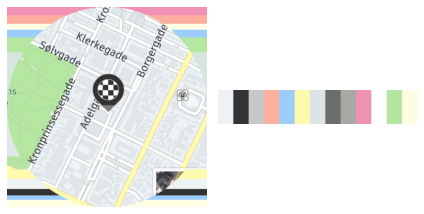

In [147]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

clt_3 = KMeans(n_clusters=13)
clt_3.fit(D.reshape(-1, 3))
print(clt_3.cluster_centers_)
show_img_compar(D, palette(clt_3))

In [272]:
maps_building_grey = 221.97199581, 228.90407829, 231.56322313
maps_nonbuilding_lightgrey = 237.8903775, 242.78641213, 244.72247764

maps_park_green = 181.00204, 229.67078497, 161.63196759
maps_greenarea_lightgreen = 
maps_biggestroad_rosa = 239, 146, 179
maps_biggerroad_salmon = 251.71704291 175.54937102 158.46131311
maps_bigroad_yellow = 253.64792093, 249.50587935, 173.05103954
maps_street_white = 254.73191827, 254.77107717, 254.78865305
maps_tekst_black = 52.27427184, 52.22451456, 56.18056519
maps_water_blue = 155, 206, 252



[181.00204    229.67078497 161.63196759]
 [237.8903775  242.78641213 244.72247764]
 [ 52.27427184  52.22451456  56.18056519]
 [245.21926073 157.6092867  170.70765236]
 [221.97045692 228.89971562 231.55741377]
 [253.64849    249.50991068 173.11076138]
 [107.65189189 109.88936937 110.26486486]
 [155.         206.         252.        ]
 [168.14685014 168.4829069  160.66480327]
 [254.33067173 254.41462393 247.38265676]
 [197.84957118 199.47324185 195.18078902]


grey_housing = 223.84, 230.06, 233.19
black = 64.08, 69.09, 70.22
blue_water = 154.56, 205.40, 250.87
green_parks = 178.10, 212.42, 166.45
red_largeroads = 247.94, 170.78, 158.98
white_smallroads = 246.55, 248.83, 246.45
darkgrey_h = 208.24, 212.66, 208.61

df_maps_color = pd.DataFrame() 
data = {'grey_housing': [0], 'black': [0], 'blue_water': [0], 'green_parks': [0], 
        'red_largeroads': [0], 'white_smallroads': [0], 'darkgrey_h': [0]}
df_maps_color = pd.DataFrame(data) 
print(df_maps_color)

def get_color(color, lower, upper, k):
    if (color[0] - lower < get_perc(clt_1)[1][k][0] < color[0] + upper): #and get_perc(clt_1)[1][k][0] < color[0] + upper:
        if color[1] - lower > get_perc(clt_1)[1][k][1] and get_perc(clt_1)[1][k][1] > color[1] + upper:
            if color[2] - lower > get_perc(clt_1)[1][k][2] and get_perc(clt_1)[1][k][2] > color[2] + upper:
                df_maps_color.loc[str(color)] = get_perc(clt_1)[0][k] #Make cloumn for each color
    return df_maps_color
        
get_color(grey_housing, 2, 2, 0)



   grey_housing  black  blue_water  green_parks  red_largeroads  \
0             0      0           0            0               0   

   white_smallroads  darkgrey_h  
0                 0           0  


,grey_housing,black,blue_water,green_parks,red_largeroads,white_smallroads,darkgrey_h
0,0,0,0,0,0,0,0


In [269]:
df_maps_color

get_perc(clt_1)[0][0]
df_maps_color.loc['grey_housing'] 

KeyError: 'grey_housing'

In [200]:
def get_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))

    
    step = 0
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
    

    
    return perc, k_cluster.cluster_centers_

clt_1 = clt.fit(img.reshape(-1, 3))
get_perc(clt_1)



({0: 0.76, 1: 0.04, 2: 0.03, 3: 0.11, 4: 0.06},
 array([[223.2690462 , 229.66891963, 230.96644284],
        [ 69.45059222,  69.68849408,  71.0536379 ],
        [125.76152557, 125.70620285, 127.17560771],
        [253.12552404, 253.27046856, 251.13637485],
        [195.56908389, 200.82428663, 193.46384896]]))

In [192]:
get_perc(clt_1)[1][0][0]

amount_of_clusters = 10
for color in range(amount_of_clusters):
    

224.16969591051654

In [155]:
#lightgrey_houses =[224.16963267 230.05426189 233.82901027]
clt_2 = clt.fit(img_2.reshape(-1, 3))
#clt_2.cluster_centers_



In [163]:
palette_perc(clt_2)

{0: 0.16, 1: 0.03, 2: 0.22, 3: 0.03, 4: 0.03, 5: 0.03, 6: 0.07, 7: 0.1, 8: 0.32, 9: 0.02}
[[240.38397619 244.23105544 240.63475133]
 [113.74324324 117.38138138 118.43118118]
 [154.60744579 205.45624749 250.93417846]
 [ 61.36157456  66.58785193  67.73618352]
 [181.72060958 227.78906628 162.96806967]
 [248.03805351 170.80511993 158.98593173]
 [207.38141116 211.72560688 207.6559932 ]
 [254.18445892 254.32471417 254.35708588]
 [223.25354661 229.56309881 232.82676097]
 [156.62610855 161.82759844 162.62610855]]


array([[[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]],

       [[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]],

       [[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]],

       ...,

       [[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]],

       [[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]],

       [[240, 244, 240],
        [240, 244, 240],
        [240, 244, 240],
        ...,
        [223, 229, 232],
        [223, 229, 232],
        [223, 229, 232]]

NameError: name 'perc' is not defined

{0: 0.32, 1: 0.22, 2: 0.03, 3: 0.07, 4: 0.03, 5: 0.1, 6: 0.03, 7: 0.03, 8: 0.02, 9: 0.16}
[[223.25664481 229.5650297  232.82309289]
 [154.60744579 205.45624749 250.93417846]
 [113.74324324 117.38138138 118.43118118]
 [207.38141116 211.72560688 207.6559932 ]
 [ 61.36157456  66.58785193  67.73618352]
 [254.18445892 254.32471417 254.35708588]
 [248.03805351 170.80511993 158.98593173]
 [181.72060958 227.78906628 162.96806967]
 [156.62610855 161.82759844 162.62610855]
 [240.38411911 244.23263027 240.64503722]]


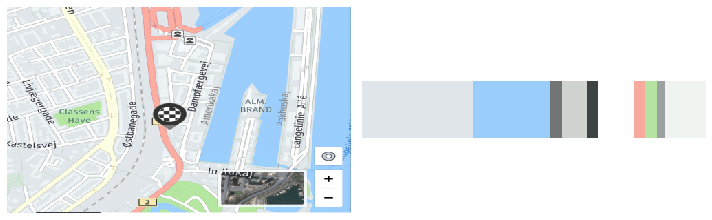

In [147]:
clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))
